  
  # Context

**Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.**

**Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.**


**The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not, The classification goal is to predict if the client will subscribe to a term deposit (variable 'deposit').**
**





# Dataset's Features

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

**other attributes:**

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**
17. deposit - has the client subscribed a term deposit? (binary: "yes","no")

In [40]:
#importing necessary libraries to extract insights and build the optimal model.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem, t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols 
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportion_confint
import os

In [41]:
#Importing the csv file using the Pandas library.

df=pd.read_excel('bank1.xlsx')
df.head() #Displaying the top 5 rows of the data.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [42]:
df.info()

#Displaying informations about every columns'sdata types as well as the number of observations in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**The dataset contains 17 features and 11162 observations all of them are non-null.**

# Exploratory and Inferential data analysis

## Descriptive Analysis

**The goal of our analysis is to discover patterns between variables within the dataset that may unravel what affects the client's decision to accept a long term deposit or decline.** 

In [43]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* The average age of individuals is 41.23 years with 95 being the oldest.
* The vast difference between the maximum value and the 3rd quartile in columns such as 'balance','duration',and 'pdays' indicates the existence of possible outliers or the large spread of data.


  


In [44]:
depo=df[df['deposit']=='yes'] #a dataframe of only potential clients.
print((len(depo)/len(df))*100,'%')    #Percentage of subscribing people.
nodepo=df[df['deposit']=='no'] #a dataframe of people who refused.


47.38398136534671 %


* 47.38 % of contacted individuals accepted the idea of a long term deposit.
* we can affirm that our dataset is fairly balanced which may help our predictive model to be more accurate.

In [45]:
depo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


In [46]:
nodepo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.00000
mean,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.52835
std,10.264815,2933.411934,8.322071,208.577530,3.244474,96.182893,1.97961
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.00000
25%,33.000000,64.000000,9.000000,94.000000,1.000000,-1.000000,0.00000
50%,39.000000,414.000000,16.000000,163.000000,2.000000,-1.000000,0.00000
75%,48.000000,1324.000000,22.000000,282.000000,3.000000,-1.000000,0.00000
max,89.000000,66653.000000,31.000000,3284.000000,63.000000,826.000000,41.00000


### Defining statistical tests functions

 ## Categorical feature analysis:

###  The full dataset's categorical varibales barplots: 

In [47]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

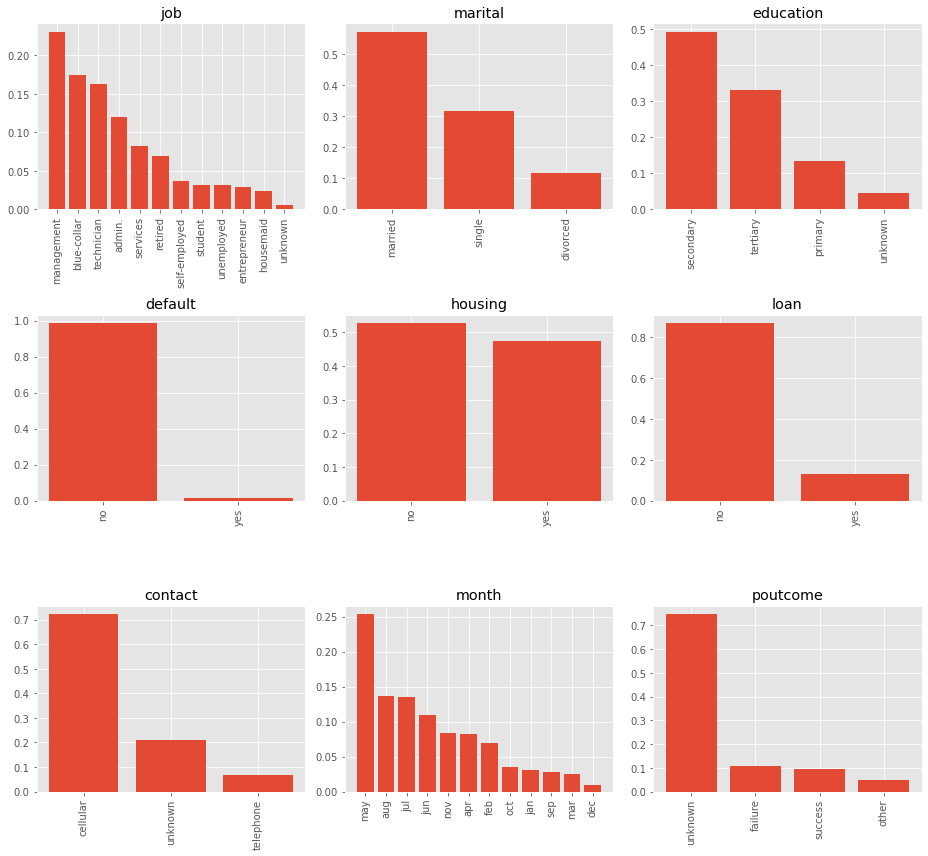

In [48]:
fig,ax=plt.subplots(3,3,figsize=(13,12))
plt.style.use('ggplot')
cat_columns=df.select_dtypes(include='object').columns[:-1]
i=0
for c in cat_columns:
    x=i//3
    y=i%3
    ax[x,y].bar(df[c].value_counts().index,df[c].value_counts()/len(df[c]))
    ax[x,y].set_xticks(df[c].value_counts().index)
    ax[x,y].set_title(c)
    for tick in ax[x,y].get_xticklabels():
        tick.set_rotation(90)
    
    
    i+=1
    
fig.tight_layout()



### Barplots of non-subscribing individuals: 

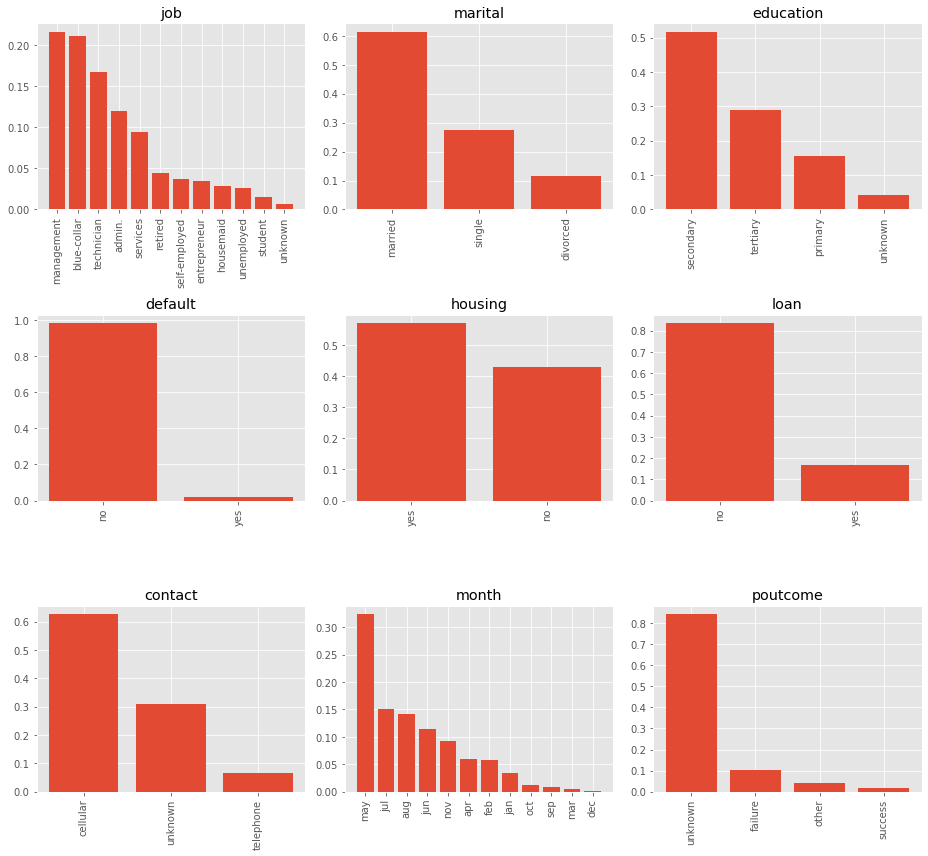

In [49]:
fig,ax=plt.subplots(3,3,figsize=(13,12))
i=0
for c in cat_columns:
    x=i//3
    y=i%3
    ax[x,y].bar(nodepo[c].value_counts().index,nodepo[c].value_counts()/len(nodepo[c]))
    ax[x,y].set_xticks(nodepo[c].value_counts().index)
    ax[x,y].set_title(c)
    for tick in ax[x,y].get_xticklabels():
        tick.set_rotation(90)
    
    
    i+=1
    
fig.tight_layout()



### Braplots of  potential clients:

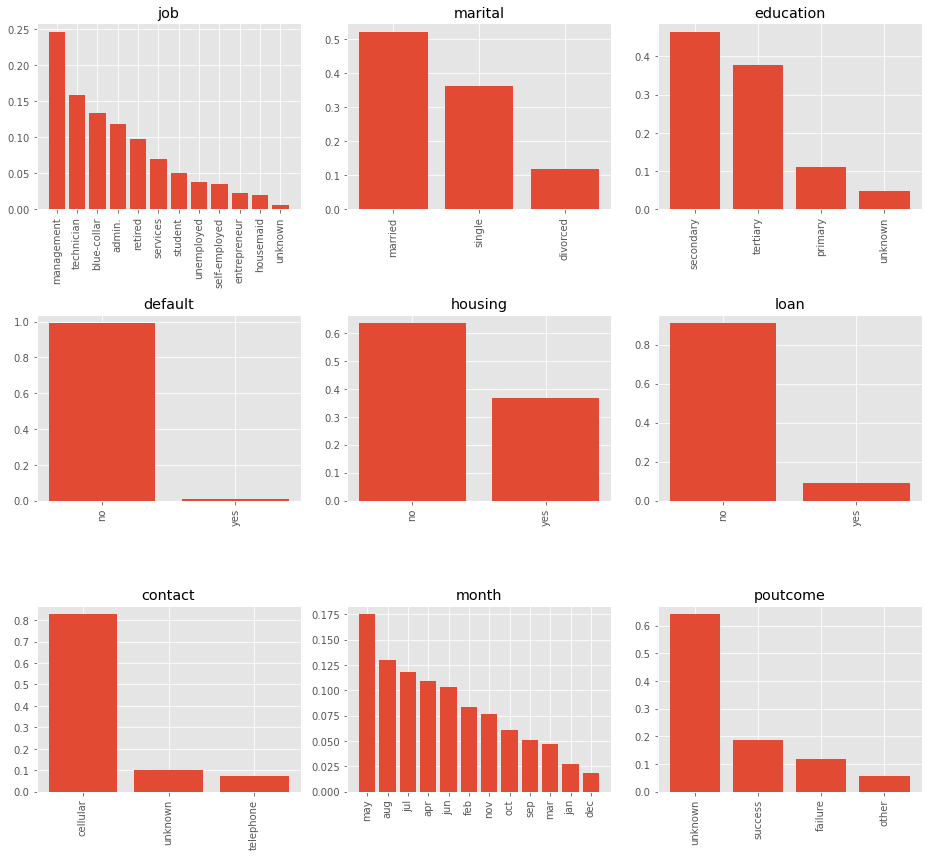

In [50]:
fig,ax=plt.subplots(3,3,figsize=(13,12))
i=0
for c in cat_columns:
    x=i//3
    y=i%3
    ax[x,y].bar(depo[c].value_counts().index,(depo[c].value_counts())/len(depo[c]))
    ax[x,y].set_xticks(depo[c].value_counts().index)
    ax[x,y].set_title(c)
    for tick in ax[x,y].get_xticklabels():
        tick.set_rotation(90)
    
    
    i+=1
    
fig.tight_layout()

#Displaying barplots of categorical features of individuals who subscribed a deposit. 

### Primary Insights:
* **The most dominant job types in the sample are 'blue-collar','management' and 'technician'.**


* **Most individuals are married, and single people are more inclined to make a deposit than others.**


* **The education graph indicates that the largest portion the sample has a 'secondary' education level followed by 'tertiary','primary' then 'unknown'.**


* **Observations with tertiary education have a higher potenatial to be future clients as we can notice in the graph above, a sharp increase in the number of individuals with tertiary level.**


* **The vast majority of individuals got a housing loan while the rest are not.**


* **Cellular is the main way of contact as over 30000 people were contacted through it,meanwhile less than 4000 were reached surveyed by telephone.**


* **As opposed to the previous 'housing' graph, individuals with housing loans represent the minority,while majority have loans to their names.**


* **People who marked a succesful outcome in the previous campaign are more likely to deposit than those who didn't.**



* **There is no radical changes in the other graphs, we notice that the same pattern of barplots got repeated with the exception of 'housing' and 'poutcome'.**

* **Individuals who were contacted at the end of the year showed more interest than others, we can see the considerable difference.**



## Numerical features analysis:

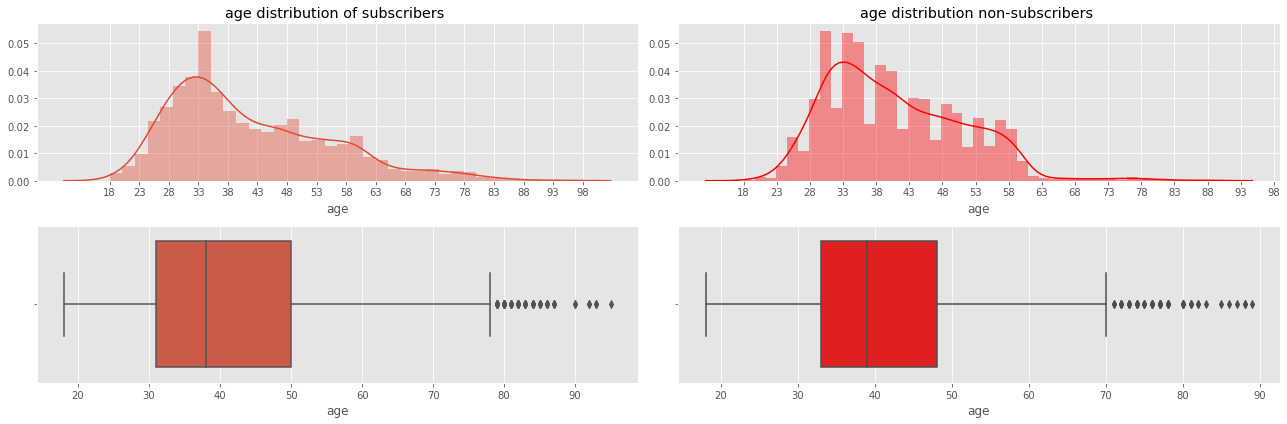

In [51]:
#Age varibale

fig,ax=plt.subplots(2,2,figsize=(18,6))
sns.distplot(depo['age'],ax=ax[0,0],hist=True)
sns.distplot(nodepo['age'],ax=ax[0,1],color='r')
sns.boxplot(depo['age'],ax=ax[1,0])
sns.boxplot(nodepo['age'],ax=ax[1,1],color='r')
ax[0,0].set_title('age distribution of subscribers ')
ax[0,0].set_xticks(np.arange(min(depo['age']),100,5))
ax[0,1].set_title('age distribution non-subscribers ')
ax[0,1].set_xticks(np.arange(min(df['age']),100,5))

fig.tight_layout()




plt.show()


* **Both distributions are right skewed with a mode of 32 which is inferior to the respective means of 41.67 and 40.9 .**

* **In the first graph the data is more spread and the right tail is longer, whereas in the second plot the range and the inter-quartile range are way tighter.**

* **In the subscribing pool of observations, we notice a difference in the distribution where age is superior to 60,older people are more likely to deposit in regards to the whole sample than those who refused.**

* **The outliers in both boxplots cannot be reliable since the data is skewed and some valuable data points can fall outwards.**





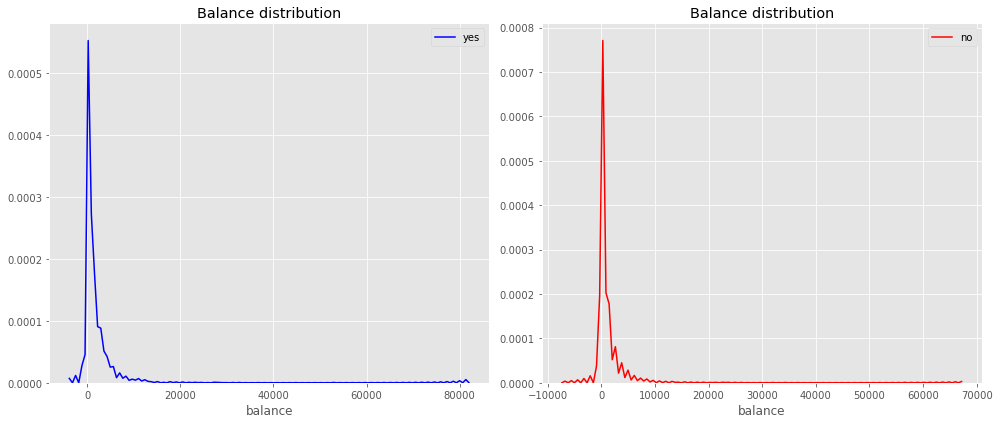

In [52]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(depo['balance'],ax=ax[0],hist=False,color='b',label='yes')
sns.distplot(nodepo['balance'],ax=ax[1],hist=False,color='r',label='no')
ax[0].set_title('Balance distribution')
ax[1].set_title('Balance distribution')





fig.tight_layout()

In [53]:
from scipy.stats import skew
print('Balance distribution (yes) skew:',skew(depo['balance']))
print('Balance distribution (no) skew:',skew(nodepo['balance']))

Balance distribution (yes) skew: 8.444308106137543
Balance distribution (no) skew: 7.742361980504877


* **The very high skewness in the balance distribution is mostly attributed to the outliers at the right tail as we can see in the plot above.**



* **The balance distribution is heavily tailed and this may indicate a high randomness in the data, in this case we can't analyze it using the central limit theorem,the mean or standard deviation since they're sensitive to outliers, instead we'll rely on quantiles.**





In [54]:
#Analyzing the balance distirbution using quantiles.

max_bal=df['balance'].quantile(0.75)+1.5*(df['balance'].quantile(0.75)-df['balance'].quantile(0.25))
min_bal=df['balance'].quantile(0.25)-1.5*(df['balance'].quantile(0.75)-df['balance'].quantile(0.25))
out_range=df[(df['balance']<min_bal) | (df['balance']>max_bal)]['balance']
bal_iqr_ratio=(df['balance'].quantile(0.75)-df['balance'].quantile(0.25))/((df['balance'].max()-df['balance'].min()))*100

print(len(out_range),'values fall outside the boxplots range of the balance data ,nearly',len(out_range)*100/len(df),' percent of the total.')

print('Balance interquantile range represents 1.8% of the whole range of the data.')

1055 values fall outside the boxplots range of the balance data ,nearly 9.451711162874037  percent of the total.
Balance interquantile range represents 1.8% of the whole range of the data.


* **Despite the large range and standard deviation of the balance distribution, a great number of values were clustered in a tight interval around the median value of 550, but indviduals with very high balance compared to the rest stretched the distribution and thus the high standard deviation.**


In [55]:
duration_difference=list() #a list of the duration difference values between the subscribing and non-subscribing groups.  

pivot_job=pd.pivot_table(df,values=['age','duration'],index=['job','deposit'],aggfunc={'duration':np.median})
for col in df['job'].unique():
        duration=pivot_job.loc[col].loc['yes']['duration']-pivot_job.loc[col].loc['no']['duration'] #Duration difference calculation
        duration_difference.append(duration)
pivot_job 


#Constructing a pivot table using the median of 'age','duration' and 'balance' as aggregate values while indexing with the 'job' and the target variable.
#Pivot tables give a simple and an easy layout to extract insights and make comparaisons between variables. 

duration
job           deposit          
admin.        no          150.0
              yes         388.0
blue-collar   no          179.0
              yes         628.0
entrepreneur  no          144.0
              yes         580.0
housemaid     no          138.0
              yes         388.0
management    no          155.0
              yes         376.0
retired       no          165.5
              yes         371.0
self-employed no          171.5
              yes         461.0
services      no          165.0
              yes         531.0
student       no          154.0
              yes         276.0
technician    no          163.0
              yes         438.5
unemployed    no          195.0
              yes         451.5
unknown       no          113.5
              yes         330.5

Text(0.5, 1.0, 'Duration distribution')

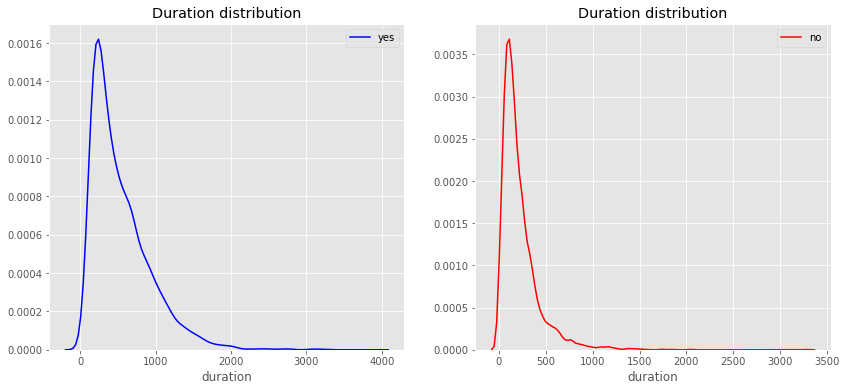

In [56]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(depo['duration'],ax=ax[0],hist=False,color='b',label='yes')
sns.distplot(nodepo['duration'],ax=ax[1],hist=False,color='r',label='no')
ax[0].set_title('Duration distribution')
ax[1].set_title('Duration distribution')


In [57]:
pivot_job2=pd.pivot_table(df,values=['duration'],index=['deposit','job'],aggfunc={'duration':np.median})
pivot_job2

duration
deposit job                    
no      admin.            150.0
        blue-collar       179.0
        entrepreneur      144.0
        housemaid         138.0
        management        155.0
        retired           165.5
        self-employed     171.5
        services          165.0
        student           154.0
        technician        163.0
        unemployed        195.0
        unknown           113.5
yes     admin.            388.0
        blue-collar       628.0
        entrepreneur      580.0
        housemaid         388.0
        management        376.0
        retired           371.0
        self-employed     461.0
        services          531.0
        student           276.0
        technician        438.5
        unemployed        451.5
        unknown           330.5

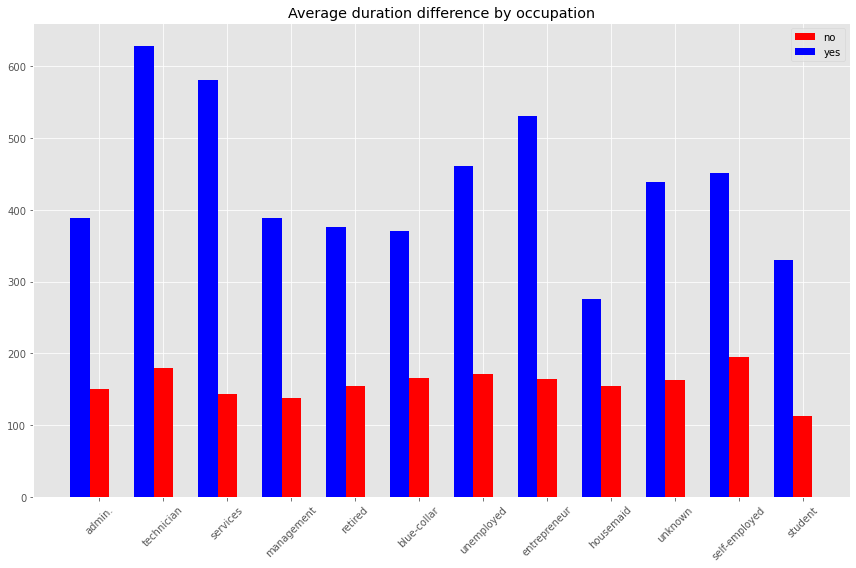

In [58]:
#This plot highlights the difference in average call's duration between both groups(potential and non-potential clients) by occupation.

indexes=np.arange(len(df['job'].unique()))
labels=list(df['job'].unique())

fig=plt.figure(figsize=(12,8))

plt.bar(indexes,pivot_job2.loc['no']['duration'],width=0.3,color='r',label='no')
plt.bar(indexes-0.3,pivot_job2.loc['yes']['duration'],width=0.3,color='blue',label='yes')
plt.title('Average duration difference by occupation')
plt.xticks(ticks=indexes,labels=labels,rotation=45)
plt.legend()

fig.tight_layout()

* **Potential clients have a higher duration than their counterparts in each occupation within the dataset, this may help us expect a considerable correlation between the target variable and the duration and balance variables.**

* **we notice a more considerable difference in duration than in balance in each occupation especially entrepneurs and blue-collar.**

* **It's quite logical to find such a relation between 'deposit' and 'duration', the more extensive the calls the more likely the client is going to be convinced of opening a term deposit.**


In [59]:
#Pivot table to compare balance and duration by marital status.
pivot_mstatus=pd.pivot_table(df,values=['duration','balance'],index=['marital','deposit'],aggfunc={'duration':np.median,'balance':np.median})
pivot_mstatus

balance  duration
marital  deposit                   
divorced no         313.0       157
         yes        587.5       490
married  no         427.5       161
         yes        881.0       429
single   no         432.0       171
         yes        650.5       405

* **Divorced individuals have way less balance than other groups.**
* **Like the job pivot table, a significant difference in call's duration between those who accepted a long term deposit and their counterparts.**
* **This table consolidates the fact that call's durations strongly affects the client's decision.**


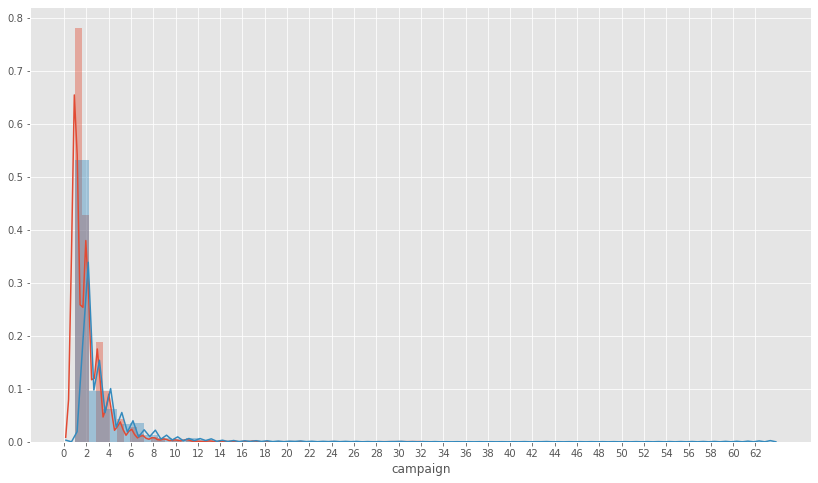

In [60]:
#The campaign distribution plot.
plt.figure(figsize=(14,8))
sns.distplot(depo['campaign'])
sns.distplot(nodepo['campaign'])
plt.xticks(np.arange(0,df['campaign'].max(),2))
plt.show()

* **The campaign distribution is heavily skewed with a long tail of a range of over 50.**
* **Both distribution indicate that most clients were contacted less than 10 times.**
* **A higher number of subscribing individuals were contacted less than 5 times, meanwhile their counterparts distribution shows less density within the same interval.**

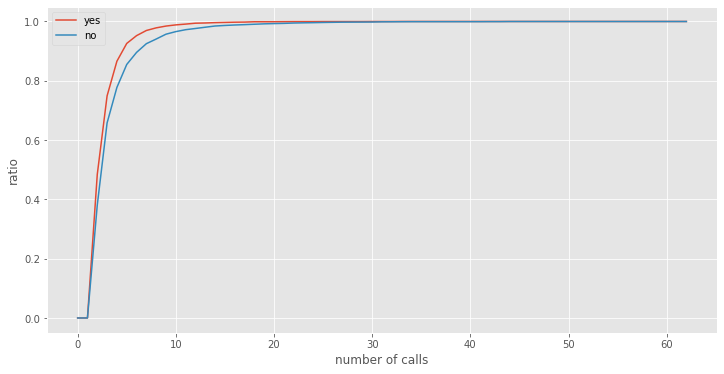

In [61]:
ratio_depo=list()
ratio_nodepo=list()

for i in range(0,df['campaign'].max()):
    d=len(depo[depo['campaign']<i]['campaign'])/len(depo)
    n=len(nodepo[nodepo['campaign']<i]['campaign'])/len(nodepo)
    ratio_depo.append(d)
    ratio_nodepo.append(n)

plt.figure(figsize=(12,6))
plt.plot(np.arange(0,df['campaign'].max()),ratio_depo,label='yes')
plt.plot(np.arange(0,df['campaign'].max()),ratio_nodepo,label='no')
plt.xlabel('number of calls')
plt.ylabel('ratio')

plt.legend(loc='best')
plt.show()

#The campaign feature tells us how many times was the client contacted.
# the relationship between the ratio of potential clients and the number of calls. 

* **This plot highlights the difference of interst between the 2 groups of clients, those who accepted the deposit generally needed less number of calls than their counterparts,the fact that when someone accepts a deposit he won't be called again plays a factor in this, within the (0,10) range, we can see that with less than 5 calls, more than 80% of the subscribing people already accepted.**


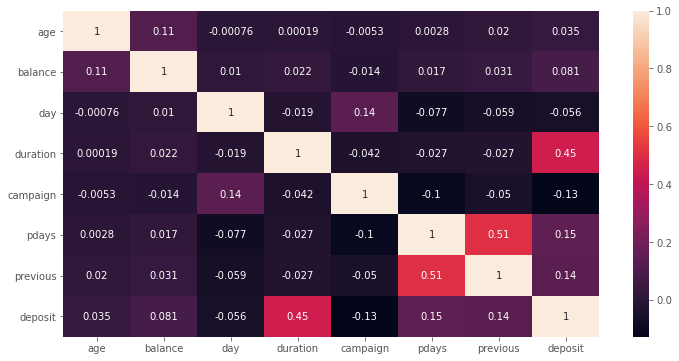

In [62]:
column={'deposit':{'yes':1,'no':0}} #Encoding the target variable so we can check its correlation with the continuous features.
df=df.replace(column)
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True) #Correlation heatmap of continuous variables.

* **As expected, duration has the highest correlation with the target variable.**
* **Also previous,pdays,campaign have a good correlation with deposit.***


## Inferential analysis

###  Defining Statistical tests functions

In [63]:
# 2 sample T-test to compare statistical significance of difference of the mean
def t_test(a,b):
    
    a1=np.array(a)
    b1=np.array(b)
    tStat, pValue = stats.ttest_ind(a1, b1, equal_var=False)

    return tStat, pValue 

In [64]:
#proportions confidence interval to predict the population proportions .
def prop_conf(count,nobs):                        
    
    ci_low, ci_upp = proportion_confint(count, nobs, alpha=0.05, method='normal')
    
    return ci_low, ci_upp

In [65]:
#Function that returns the upper and lower borders of the population mean's confidence interval.
def conf_mean(df,col):
    alpha=0.05
    dfree=len(df[col])-1 #degrees of freedom
    SE=sem(df[col])    #Standard Error
    T = t.ppf(alpha/2, dfree, loc=0, scale = 1) #T-statistic
    ME = T *SE      #Marginal error
    myMean=df[col].mean()   #Sample mean
    LCL = myMean + ME
    UCL = myMean - ME
    print('The confidence interval for {} is'.format(col),LCL, UCL)  
     

In [66]:
#Anova test function to test mean difference between several groups(more than 2).
def anova_test(numeric,cat):
    model = ols('{} ~ {}'.format(numeric,cat), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('the ANOVA table for {} and {}:\n'.format(numeric,cat),anova_table)

**As shown previously in the duration graph , we can clearly see the difference of average between jobs. But to determine whether the outcome is significant statistically, we will perform the ANOVA test which compares the mean between different groups.**

**But first we have to assure the pre-requesits of applying the ANOVA test which are normality,independence of samples and equality of variance.**

* H0 ( Null Hypothesis )= All jobs have the same mean.
* Ha ( Alternate Hypothesis ) = There is at least one job type with different duration mean.

In [67]:
#ANOVA test with job as categorical feature and duration as the continuous variable
anova_test('duration','job')
anova_test('balance','job')

the ANOVA table for duration and job:
                 sum_sq       df         F    PR(>F)
job       4.659088e+06     11.0  3.523764  0.000059
Residual  1.340220e+09  11150.0       NaN       NaN
the ANOVA table for balance and job:
                 sum_sq       df         F        PR(>F)
job       1.418253e+09     11.0  12.53428  6.367901e-24
Residual  1.146929e+11  11150.0       NaN           NaN


* **the P-value equals 0.000059 which is inferior to alpha=0.05. Therefore we can confidently reject the null hypothesis H0 and accept its alternative which means the is a minimum of one group with a different average duration.**

* **The same can be said for the balance variable,with a P-value that is infinitely small we can reject the null hypothesis that suggests the average balance of all groups is the same.**

**we're going to apply the same test to other categorical features like education and marital status and assess the outcome.**

In [68]:
conf_mean(df,'age') #Calculating  the confidence interval for the population age mean.

The confidence interval for age is 41.01091383259875 41.452981526655854


* **We are 95 percent sure that the population mean is somewhere between 41.01 and 41.45 which is a basically small range.**

**The duration feature turned out to be very important therefore it is crucial to determine more insights about it, That's why our next question is what is the confidence interval where population means for duration exists.**

In [69]:
conf_mean(depo,'duration')
conf_mean(nodepo,'duration')

The confidence interval for duration is 526.7135341313933 547.8756131554285
The confidence interval for duration is 217.7947569305138 228.46575728709217


* **With a 95 percent confidence, we can assure that the average duration for the subscribing population is between 526 and 547,meanwhile for the refuting population, it's somwhere between 228 mins and 217 mins.**
* **This finding definitely helps in determining how much should a call last in order to influence a client.**

**We would like to determine the confidence interval of the population's potential client proportions.**

In [70]:
#Proportion confidence interval
prop_conf(df['deposit'].value_counts()[1],len(df))

(0.46457680973687665, 0.4831028175700576)

**We are 95% sure that the potential clients represent a value that lies somewhere between 46.4% and 48.3% out of the whole population.**

In [80]:
df[df['poutcome']=='success']['deposit'].value_counts()

1    978
0     93
Name: deposit, dtype: int64

In [ ]:
#Cramer's V number is used to determine how strong the association between 2 categrorical variables and it is using the 'chi 2 test'.
#I used it to explore the correlation between each categorical feature and the target variable'y'.
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
cram={} 
for c in df.select_dtypes(include=('object')).columns: #Only categorical variables can be tested with this fucntion.
    crv=cramers_v(df[c],df['deposit'])
    cram[c]=crv
print(cram)